## Finding best place for a new well by OilyGiant mining company

### Steps to choose the location:
1. Collect the oil well parameters in the selected region: oil quality and volume of reserves;
2. Build a model for predicting the volume of reserves in the new wells;
3. Pick the oil wells with the highest estimated values;
4. Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. 
Parameters of each oil well in the region are already known. 
Build a model that will help to pick the region with the highest profit margin. 
Analyze potential profit and risks using the Bootstrapping technique.

### Conditions:
1. Only linear regression is suitable for model training (the rest are not sufficiently predictable).
2. When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
3. The budget for development of 200 oil wells is 100 USD million.
4. One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
5. After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
6. The data is synthetic: contract details and well characteristics are not disclosed.

### Importing libraries

In [2]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

### 1. Download and prepare the data. Explain the procedure.

### Reading the csv files and preparing the data

In [3]:
region1 = pd.read_csv('/datasets/geo_data_0.csv')
region2 = pd.read_csv('/datasets/geo_data_1.csv')
region3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
region3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


##### Checked for datatypes and missing values. Nothing to be changed. Data looks good.

### 2. Train and test the model for each region:

###### 2.1. Split the data into a training set and validation set at a ratio of 75:25.

In [10]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(region1.drop(columns = ['id', 'product']), region1['product'], test_size=0.25, random_state=12345)
print(len(train_x1), len(test_x1))

75000 25000


In [11]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(region2.drop(columns = ['id', 'product']), region2['product'], test_size=0.25, random_state=12345)
print(len(train_x1), len(test_x1))

75000 25000


In [12]:
train_x3, test_x3, train_y3, test_y3 = train_test_split(region3.drop(columns = ['id', 'product']), region3['product'], test_size=0.25, random_state=12345)
print(len(train_x1), len(test_x1))

75000 25000


#### 2.2. Train the model and make predictions for the validation set

In [13]:
model1 = LinearRegression()
model1.fit(train_x1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model2 = LinearRegression()
model2.fit(train_x2, train_y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model3 = LinearRegression()
model3.fit(train_x3, train_y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 2.3. Save the predictions and correct answers for the validation set.

In [16]:
pred_1=model1.predict(test_x1)
pred_2=model2.predict(test_x2)
pred_3=model3.predict(test_x3)

In [17]:
profit_df1 = pd.DataFrame({"target": test_y1, "pred": pred_1})
profit_df1.head()

,target,pred
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088


In [18]:
profit_df2 = pd.DataFrame({"target": test_y2, "pred": pred_2})
profit_df2.head()

,target,pred
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856


In [19]:
profit_df3 = pd.DataFrame({"target": test_y3, "pred": pred_3})
profit_df3.head()

,target,pred
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310


#### 2.4. Print the average volume of predicted reserves and model RMSE.

In [20]:
mean1 = pred_1.mean()
mean2 = pred_2.mean()
mean3 = pred_3.mean()
print("Average Volume of Predicted Reserves for Region1 is", mean1)
print("Average Volume of Predicted Reserves for Region2 is", mean2)
print("Average Volume of Predicted Reserves for Region3 is", mean3)

Average Volume of Predicted Reserves for Region1 is 92.59256778438038
Average Volume of Predicted Reserves for Region2 is 68.728546895446
Average Volume of Predicted Reserves for Region3 is 94.96504596800489


In [21]:
print("RMSE for Region1 Model is", math.sqrt(mean_squared_error(test_y1 ,pred_1)))
print("RMSE for Region2 Model is", math.sqrt(mean_squared_error(test_y2 ,pred_2)))
print("RMSE for Region3 Model is", math.sqrt(mean_squared_error(test_y3 ,pred_3)))

RMSE for Region1 Model is 37.5794217150813
RMSE for Region2 Model is 0.893099286775616
RMSE for Region3 Model is 40.02970873393434


#### 2.5. Analyze the results.

RMSE value for model of region2 is low. Which shows model is predicting with good accuracy.

While model Region1 and Region3 are performing. This behaviour is because of kind of data we have for each regions

Mean value and RMSE of Region1 and Region3 are same.

#### Step3. Prepare for profit calculation:

##### 3.1. Store all key values for calculations in separate variables.

In [22]:
Revenue_per_product = 4500
No_wells = 200
Sample_size=500
Budget = 100000000

The budget for development of 200 oil wells is 100 USD million.

One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

#### 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

For a developing 200 oil wells our budget is 100 USD million

In [23]:
cost_pr_well = Budget/200
cost_pr_well

500000.0

Lets Calculate the volume of reserves sufficient for developing a new well without losses. One Unit of product is giving us 4500USD so we we can say that we can get 4500USD/product.

As we know that, profit = revenue - cost and we want to have profit>0 so revenue>cost

if revenue == cost its our break no point for developing a new well without losses.

The volume for such point can be calculated as below

In [24]:
break_even_vol = cost_pr_well/4500
break_even_vol

111.11111111111111

In [25]:
print("Average Volume of Predicted Reserves for Region1 is", mean1)
print("Average Volume of Predicted Reserves for Region2 is", mean2)
print("Average Volume of Predicted Reserves for Region3 is", mean3)

Average Volume of Predicted Reserves for Region1 is 92.59256778438038
Average Volume of Predicted Reserves for Region2 is 68.728546895446
Average Volume of Predicted Reserves for Region3 is 94.96504596800489


#### 3.3. Provide the findings about the preparation for profit calculation step.

According to our model prediction,

1. mean of region1 & region3 volume is 94.96504596800489 which is same to our break_even_vol which is 111.11, While region2 has very far mean value 68.728546895446 from break_even_vol.

2. This shows that there more chances that if we choose region1 or region3 for wells, we will be in profit because it has mean value of Oil Volume closer to break even point.

3. We can calculate profit by subtracting break_even_vol from vol of each regions and then multiply it with 4500 to get it in the USD, if it shows positive value, its our profit.

4. Higher the positive value, Higher will be the profit. Our objective is to find region and wells with high profit

### Step4. Write a function to calculate profit from a set of selected oil wells and model predictions:

#### 4.1. Pick the wells with the highest values of predictions.

Lets take sample of 500 for each region and analyse data

In [32]:
def sampler(df, sample_size=500):
    target_sample1 = df['target'].sample(n=sample_size, replace=True)
    pred_sample1 = df['pred'][target_sample1.index]
    return target_sample1, pred_sample1
state = np.random.RandomState(12345)

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you use random_sate for sampling.
</div>

<div class="alert alert-block alert-info">
<b>Improve[3]: </b> Define here outside of function. And use for sample method.
    
    state = np.random.RandomState(12345)
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing[4]:</b> It's better to do it all the same, as I wrote above <br>
    Please Define here outside of function. And use for sample method.
    
    
    
    state = np.random.RandomState(12345)
                                       

Your version is not suitable, because every time sample is split the same way and the sample does not become randomly normal distributed.
    
With this, the method that I propose will give different results when sampling, However, the result will be deterministic for each launch of the project.
</div>

In [33]:
target_sample1, pred_sample1 = sampler(profit_df1)
pred_sample1.sort_values(ascending=False)[:10]

24596    156.498586
32761    153.885412
50884    152.216740
54144    150.574800
22260    149.836266
1520     147.452642
22507    146.462111
21141    143.103286
21130    142.880072
17303    142.659784
Name: pred, dtype: float64

In [34]:
target_sample2, pred_sample2 = sampler(profit_df2)
pred_sample2.sort_values(ascending=False)[:10]

42661    139.431653
56412    138.789576
69016    138.510696
15400    138.332665
12233    138.240036
59131    138.140655
40738    138.059095
64549    137.979081
58417    137.818650
51720    137.783169
Name: pred, dtype: float64

In [35]:
target_sample3, pred_sample3 = sampler(profit_df3)
pred_sample3.sort_values(ascending=False)[:10]

93243    148.635733
85167    147.934272
95798    146.308252
69774    141.230758
40380    141.102733
75641    137.482113
61870    136.493292
3858     134.262050
9417     134.087219
30369    132.330856
Name: pred, dtype: float64

region1 shows highest values in this samples

### 4.2. Summarize the target volume of reserves in accordance with these predictions

In [36]:
pd.DataFrame({'target': target_sample1, 'pred': pred_sample1}).head(10)

,target,pred
41488,42.339489,92.725714
19708,84.747601,104.465137
57031,138.599784,87.147522
55474,32.109909,37.495431
75006,26.726084,85.875976
89350,39.581235,64.232844
34439,7.032617,61.334552
57774,173.570587,124.829199
3304,155.259875,112.881884
54276,36.203604,60.472858


In [37]:
pd.DataFrame({'target': target_sample2, 'pred': pred_sample2}).head(10)

,target,pred
30757,26.953261,29.264150
27362,137.945408,136.672908
89747,110.992147,110.528726
78958,53.906522,54.433557
5825,57.085625,57.496874
97586,0.000000,1.324386
73491,57.085625,56.445887
83985,3.179103,2.356640
67284,110.992147,111.313997
45281,107.813044,108.456210


In [38]:
pd.DataFrame({'target': target_sample3, 'pred': pred_sample3}).head(10)

,target,pred
81790,82.203084,79.294029
30436,52.780825,65.702134
3512,132.565604,115.366624
66836,136.015662,118.532236
78963,91.809712,81.642559
14837,110.185722,109.077482
75262,152.584849,117.544937
54989,72.236258,79.824091
49238,171.500268,126.064265
78896,159.861493,114.888850


Above observations shows that,

For region2 target value and prediction values are very closer.                                                                 
For region1 and region3 predictions are bit deviated from original feature values.                                             
This shows that for profit calculation we should use target values.                                                         

### 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [39]:
def profit(target, predict, budget=100000000):
    top_predictions = predict.sort_values(ascending=False)
    top_targets = target[top_predictions.index][:200]
    revenue = sum(top_targets)*4500
    profit = revenue - budget
    return profit

In [40]:
print("Total Profit for region1:", profit(target_sample1, pred_sample1))
print("Total Profit for region2:", profit(target_sample2, pred_sample2))
print("Total Profit for region3:", profit(target_sample3, pred_sample3))

Total Profit for region1: 3528985.387815401
Total Profit for region2: 4591507.434558511
Total Profit for region3: 5933033.6037658155


#### This shows region1 is having high profit. Lets try bootstrapping to get more accurate results.

## Step5: Calculate risks and profit for each region:

### 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [41]:
def bootstrapper(df, samples=1000, subsamples=500):
    values = []
    for i in range(samples):
        target_sample, pred_sample = sampler(df, subsamples)
        values.append(profit(target_sample, pred_sample))
    return values

#### Region1:

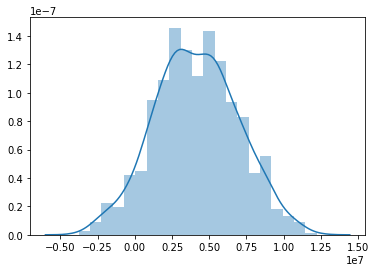

In [42]:
values_r1 = bootstrapper(profit_df1, samples=1000, subsamples=500)
sns.distplot(values_r1)

#### Region2: 

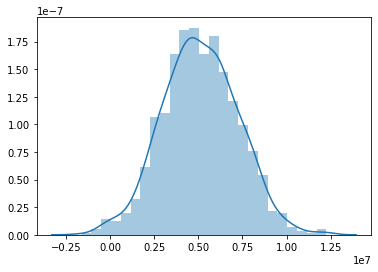

In [43]:
values_r2 = bootstrapper(profit_df2, samples=1000, subsamples=500)
sns.distplot(values_r2)

#### Region3:

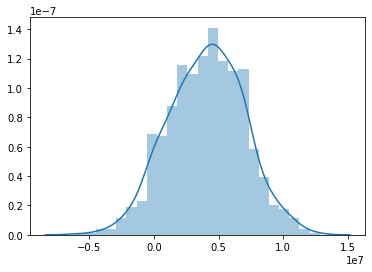

In [44]:
values_r3 = bootstrapper(profit_df3, samples=1000, subsamples=500)
sns.distplot(values_r3)

### 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

Lets find Average Profit,

In [45]:
values_r1 = pd.Series(values_r1)
values_r2 = pd.Series(values_r2)
values_r3 = pd.Series(values_r3)

In [46]:
avg_profit_1=values_r1.mean()
avg_profit_2=values_r2.mean()
avg_profit_3=values_r3.mean()
print("For Region1 mean values of profit:",avg_profit_1)
print("For Region2 mean values of profit:",avg_profit_2)
print("For Region3 mean values of profit:",avg_profit_3)

For Region1 mean values of profit: 4136264.5137122944
For Region2 mean values of profit: 5111243.642372453
For Region3 mean values of profit: 4048055.1847328884


According to the above observations we can say that region2 will give us more profit

Lets find 95% Confidence Interval,

In [47]:
def conf_in_finder(values, conf=0.95):
    c = (1-conf)/2
    lower = values.quantile(c)
    upper = values.quantile(1-c)
    return (lower, upper)

In [48]:
print("95% Confidence Interval for Region1 is", conf_in_finder(values_r1))
print("95% Confidence Interval for Region2 is", conf_in_finder(values_r2))
print("95% Confidence Interval for Region3 is", conf_in_finder(values_r3))

95% Confidence Interval for Region1 is (-1550415.7090607523, 9562928.282445088)
95% Confidence Interval for Region2 is (887398.520785328, 9036587.410685709)
95% Confidence Interval for Region3 is (-1647395.250754712, 9757547.788039552)


For Region2 lower confidence limit is Positive, While other Regions has Negative confidence Limit         
Region2 upper confidence limit is Lower compare to other regions

Lets find risk of loss,

In [49]:
def ROL_finder(values):
    return (sum(values<0)/len(values))*100

In [50]:
print("Risk of Loss for Region1 is", ROL_finder(values_r1))
print("Risk of Loss for Region2 is", ROL_finder(values_r2))
print("Risk of Loss for Region3 is", ROL_finder(values_r3))

Risk of Loss for Region1 is 7.1
Risk of Loss for Region2 is 1.0
Risk of Loss for Region3 is 8.799999999999999


Considering the business condition that we can only keep the regions with the risk of losses lower than 2.5%, Region 2 has less risk of 1.0% - i would suggest region 2 for development of oil wells.

### 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

According to our Analysis,

Region2 gives better profit compare to other two regions.                                                                       
Based on the condition risk of losses lower than 2.5%, region 2 satisfy the condition.                               
I would suggest region2 for new development of oil wells. 